In [13]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import random_clifford

# Generate a random Clifford operator
qc = QuantumCircuit(5)

# Add gates to the circuit
qc.cx(1,0)
qc.h(2)
qc.z(3)
qc.h(0)
qc.h(1)
qc.cx(4,2)
qc.cx(0,1)
qc.x(2)
qc.cx(3,4)
qc.cx(1,2)
qc.z(3)
qc.s(0)
qc.t(2)
qc.cx(4,3)


# Convert the quantum circuit to a latex source code
latex_src = circuit_drawer(qc, output='latex_source')

# Extract the TikZ part from the latex source code
tikz_code = latex_src[latex_src.find("\\begin{tikzpicture}"):latex_src.find("\\end{tikzpicture}")+len("\\end{tikzpicture}")]

print(tikz_code)

In [14]:
print(latex_src)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \targ & \gate{\mathrm{H}} & \ctrl{1} & \gate{\mathrm{S}} & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \ctrl{-1} & \gate{\mathrm{H}} & \targ & \ctrl{1} & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \targ & \gate{\mathrm{X}} & \targ & \gate{\mathrm{T}} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{Z}} & \qw & \ctrl{1} & \gate{\mathrm{Z}} & \targ & \qw & \qw\\
	 	\nghost{{q}_{4} :  } & \lstick{{q}_{4} :  } & \qw & \ctrl{-2} & \targ & \qw & \ctrl{-1} & \qw & \qw\\
\\ }}
\end{document}


In [15]:
import pyzx as zx
# Assuming 'qc' is your QuantumCircuit
qasm_str = qc.qasm()

# Convert QASM to PyZX circuit
pyzx_circuit = zx.Circuit.from_qasm(qasm_str)

print(pyzx_circuit)

Circuit(5 qubits, 0 bits, 14 gates)


In [16]:
import pyzx as zx
zx.settings.quantomatic_location = "Quantomatic-v0.7.jar"
zx.settings.tikzit_location = "/usr/bin/tikzit"
g = pyzx_circuit.to_graph()
# g = zx.generate.cliffordT(3,10,0.2)
# g2 = zx.quantomatic.edit_graph(g) 

In [17]:
zx.tikz.tikzit(g) 

Opening Tikzit...
Done


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.extensions import Initialize
from numpy import cos, sin, pi, exp

# Create a magic state |A> = cos(pi/8)|0> + exp(i*pi/4)sin(pi/8)|1>
magic_state = Initialize([1.0, exp(-1j*pi/4)],normalize=True)

# Create a circuit for magic state injection
qc = QuantumCircuit(2)
qc.append(magic_state, [1])
qc.cx(0, 1)
qc.measure([])


/home/exaclior/.conda/envs/pyzx/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


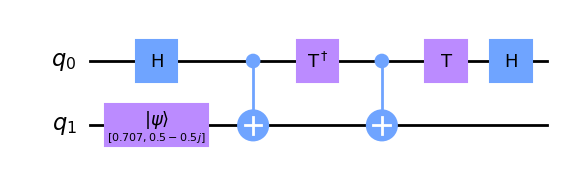

In [5]:
qc.draw('mpl')